In [46]:
# Load all neccessary packages and print their versions
import sys
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
import sklearn

print("Python: {}" .format(sys.version))
print("Numpy : {}" .format(np.__version__))
print("pandas : {}" .format(pd.__version__))
print("Matplotlib : {}" .format(matplotlib.__version__))
print("Seaborn : {}" .format(sns.__version__))
print("Scipy : {}" .format(scipy.__version__))
print("Sklearn:{}" .format(sklearn.__version__))

Python: 3.7.0 (default, Aug 14 2018, 19:12:50) [MSC v.1900 32 bit (Intel)]
Numpy : 1.15.1
pandas : 0.23.4
Matplotlib : 2.2.3
Seaborn : 0.9.0
Scipy : 1.1.0
Sklearn:0.19.2


In [37]:
#Load the dataset using pandas

full_data = pd.read_csv("C:/Users/DELL/Documents/kaggle learn/projects/credit card fraud detection/creditcard.csv")


In [38]:
#Explore the dataset

print(full_data.columns)
print(full_data.shape)
print(full_data.describe())

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')
(284807, 31)
                Time            V1            V2            V3            V4  \
count  284807.000000  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean    94813.859575  3.919560e-15  5.688174e-16 -8.769071e-15  2.782312e-15   
std     47488.145955  1.958696e+00  1.651309e+00  1.516255e+00  1.415869e+00   
min         0.000000 -5.640751e+01 -7.271573e+01 -4.832559e+01 -5.683171e+00   
25%     54201.500000 -9.203734e-01 -5.985499e-01 -8.903648e-01 -8.486401e-01   
50%     84692.000000  1.810880e-02  6.548556e-02  1.798463e-01 -1.984653e-02   
75%    139320.500000  1.315642e+00  8.037239e-01  1.027196e+00  7.433413e-01   
max    172792.000000  2.454930e+00  2.205773e+01  9.382558e+00  1.687534e+01   

 

In [39]:
#sample the dataset
data = full_data.sample(frac=0.1, random_state=1)
print(data.shape)

(28481, 31)


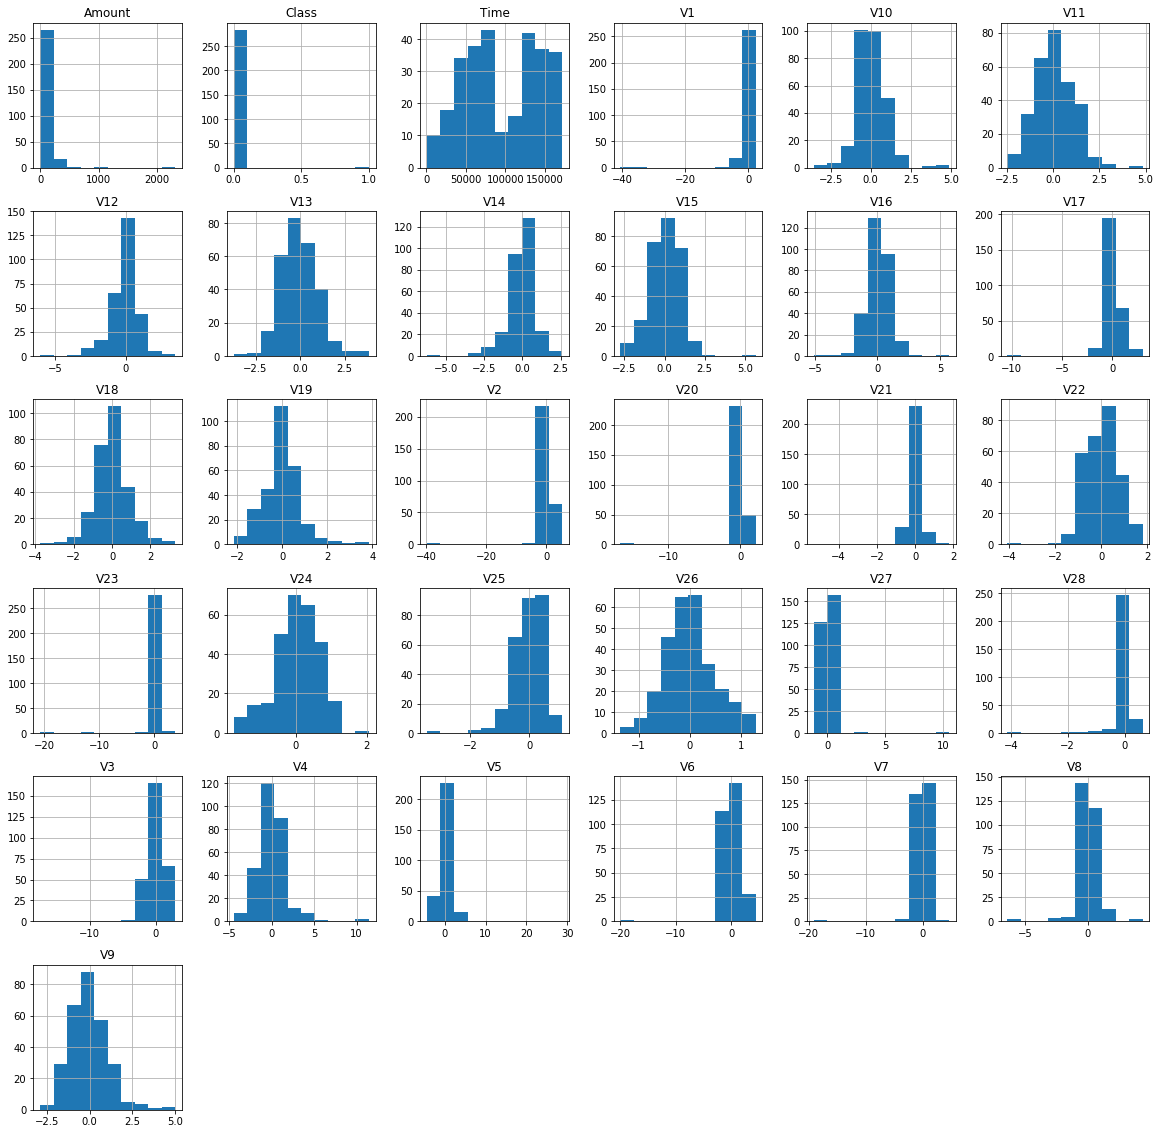

In [31]:
#plot histogram of each parameter
data.hist(figsize=(20,20))
plt.show()

In [40]:
#Determine the number of fraud cases in the dataset

fraud = data[data['Class']==1]
valid = data[data['Class']==0]

outlier_fraction = len(fraud)/float(len(valid))
print (outlier_fraction)

print ('fraud cases:{}'.format(len(fraud)))
print ('valid cases:{}'.format(len(valid)))

0.0017234102419808666
fraud cases:49
valid cases:28432


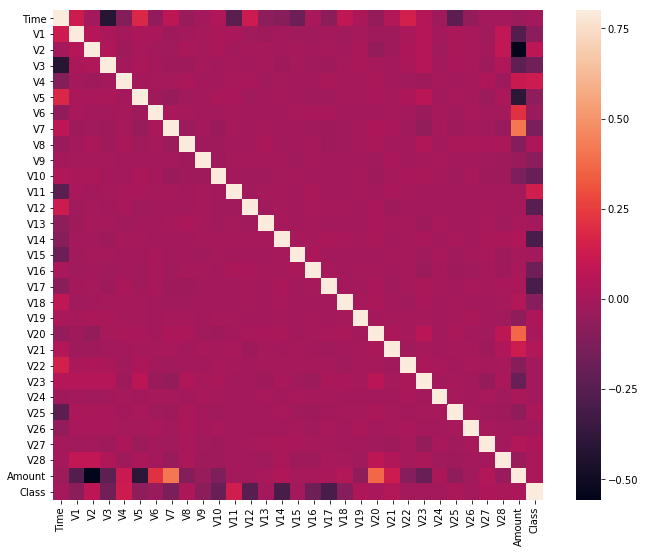

In [41]:
#correlation matrix
corrmat = data.corr()
fig = plt.figure(figsize=(12,9))

sns.heatmap(corrmat,vmax =0.8, square =True)
plt.show()

In [42]:
#Get all columns to list 

columns = data.columns.tolist()
ro,
#filter out the columns to remove data we dont want

columns = [c for c in columns if c not in ['Class']]

#target variable
target = "Class"

#X and y
X = data[columns]
Y = data[target]

print(X.shape)
print(Y.shape)

(28481, 30)
(28481,)


In [52]:
from sklearn.metrics import classification_report, accuracy_score
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor

#define a random state

state =1

#define outlier detection methods

classifiers ={
    "Isolation Forest" : IsolationForest(max_samples = len(X),
                                        contamination = outlier_fraction, 
                                        random_state = state), 
    "Local Outlier Factor" : LocalOutlierFactor(n_neighbors =20,
                                                contamination = outlier_fraction)
}
s
#number of outlier
n_outliers = len(fraud)


In [55]:
for i,(clf_name, clf) in enumerate(classifiers.items()):
    if clf_name == "Local Outlier Factor":
        y_pred = clf.fit_predict(X)
        scores_pred = clf.negative_outlier_factor_
    else:
        clf.fit(X)
        scores_pred = clf.decision_function(X)
        y_pred = clf.predict(X)
        
    #reshape the prediction to 0 for valid and 1 for fraud
    y_pred[y_pred ==1] =0
    y_pred[y_pred ==-1] =1
    
    n_errors = (y_pred != Y).sum() 
    
    #Run classification metrics
    
    print('{}:{}' .format(clf_name,n_errors))
    print(accuracy_score(Y,y_pred))
    print(classification_report(Y,y_pred))

C:\Users\DELL\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Isolation Forest:71
0.99750711000316
             precision    recall  f1-score   support

          0       1.00      1.00      1.00     28432
          1       0.28      0.29      0.28        49

avg / total       1.00      1.00      1.00     28481

Local Outlier Factor:97
0.9965942207085425
             precision    recall  f1-score   support

          0       1.00      1.00      1.00     28432
          1       0.02      0.02      0.02        49

avg / total       1.00      1.00      1.00     28481

